<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи-бинарной-классификации" data-toc-modified-id="Постановка-задачи-бинарной-классификации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи бинарной классификации</a></span></li><li><span><a href="#Решение-с-помощью-sklearn" data-toc-modified-id="Решение-с-помощью-sklearn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Решение с помощью sklearn</a></span></li><li><span><a href="#Log-loss,-aka-logistic-loss-or-cross-entropy-loss." data-toc-modified-id="Log-loss,-aka-logistic-loss-or-cross-entropy-loss.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Log loss, aka logistic loss or cross-entropy loss.</a></span></li><li><span><a href="#Поиск-весов-с-помощью-scipy.optimize" data-toc-modified-id="Поиск-весов-с-помощью-scipy.optimize-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Поиск весов с помощью scipy.optimize</a></span></li><li><span><a href="#Поиск-весов-вручную-(с-помощью-градиентного-спуска)" data-toc-modified-id="Поиск-весов-вручную-(с-помощью-градиентного-спуска)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Поиск весов вручную (с помощью градиентного спуска)</a></span></li><li><span><a href="#Оценка-качества.-AUC" data-toc-modified-id="Оценка-качества.-AUC-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Оценка качества. AUC</a></span><ul class="toc-item"><li><span><a href="#Логика-вычисления" data-toc-modified-id="Логика-вычисления-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Логика вычисления</a></span></li><li><span><a href="#Сравнение-моделей-с-различными-AUC" data-toc-modified-id="Сравнение-моделей-с-различными-AUC-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Сравнение моделей с различными AUC</a></span></li><li><span><a href="#Вероятностный-смысл-AUC" data-toc-modified-id="Вероятностный-смысл-AUC-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Вероятностный смысл AUC</a></span></li><li><span><a href="#Gini-coefficient-(не-путать-с-Gini-impurity)" data-toc-modified-id="Gini-coefficient-(не-путать-с-Gini-impurity)-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Gini coefficient (не путать с Gini impurity)</a></span></li><li><span><a href="#Оценка-качества-модели-с-помощью-AUC" data-toc-modified-id="Оценка-качества-модели-с-помощью-AUC-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Оценка качества модели с помощью AUC</a></span></li><li><span><a href="#Используя-реализацию-из-sklearn" data-toc-modified-id="Используя-реализацию-из-sklearn-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Используя реализацию из sklearn</a></span></li><li><span><a href="#Домашнее-задание.-ROC-AUC-без-использования-готовой-реализации" data-toc-modified-id="Домашнее-задание.-ROC-AUC-без-использования-готовой-реализации-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Домашнее задание. ROC AUC без использования готовой реализации</a></span></li><li><span><a href="#Игрушечный-пример" data-toc-modified-id="Игрушечный-пример-6.8"><span class="toc-item-num">6.8&nbsp;&nbsp;</span>Игрушечный пример</a></span></li></ul></li><li><span><a href="#Другие-способы-построить-разделительную-линию" data-toc-modified-id="Другие-способы-построить-разделительную-линию-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Другие способы построить разделительную линию</a></span><ul class="toc-item"><li><span><a href="#Fisher's-LDA" data-toc-modified-id="Fisher's-LDA-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Fisher's LDA</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#Обучение-SVM-и-LDA" data-toc-modified-id="Обучение-SVM-и-LDA-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Обучение SVM и LDA</a></span></li><li><span><a href="#Сравнение-decision-boundary-алгоритмов" data-toc-modified-id="Сравнение-decision-boundary-алгоритмов-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Сравнение decision boundary алгоритмов</a></span></li><li><span><a href="#Коэффициенты-разделяющих-линий" data-toc-modified-id="Коэффициенты-разделяющих-линий-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Коэффициенты разделяющих линий</a></span></li></ul></li></ul></div>

# Постановка задачи бинарной классификации

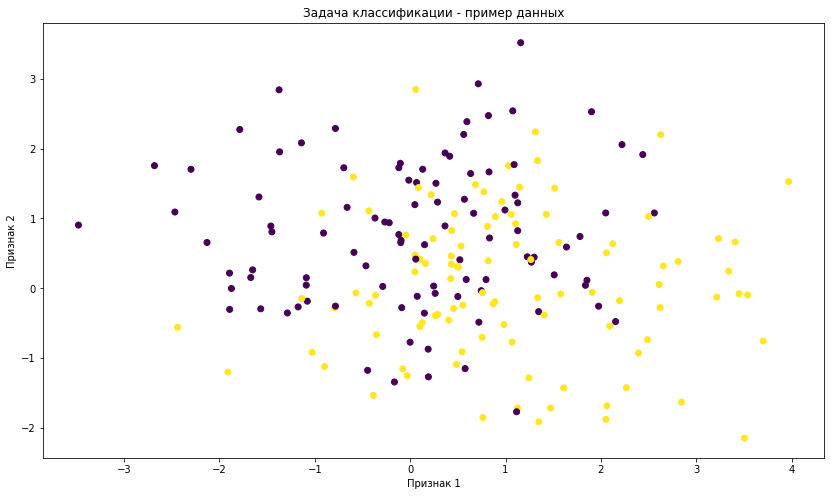

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=1, random_state=42)

# Визуализация данных
plt.figure(figsize=(14, 8))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Задача классификации - пример данных')
plt.show()

# Решение с помощью sklearn

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty=None)               # Убираем penalty
model.fit(X,y)
print(model.coef_, model.intercept_)

# Функция для визуализации границы принятия решений
def plot_decision_boundary(model, title):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

[[ 0.64910551 -0.68625803]] [-0.05601439]


# Log loss, aka logistic loss or cross-entropy loss.

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html
- https://alexanderdyakonov.wordpress.com/2018/03/12/логистическая-функция-ошибки/
- https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf

Функция log loss - аналог MSE для задачи классификации

<img src='https://i.stack.imgur.com/Xxc9W.png'>

Likelihood:

In [4]:
# y = [0,0,1,1,1]
# y_pred_prob_1 = [0.02, 0.03, 0.95, 0.94, 0.92]
# y_pred_prob_2 = [0.4, 0.3, 0.7, 0.8, 0.75]

# Первая модель - лучше (она увереннее предсказывает ответы)

<img src='https://miro.medium.com/v2/resize:fit:1400/1*KrQqI25cQ91OmEfZhYiKYg.jpeg'>

Еще одно важное свойство сигмоиды:

<img src = 'https://hausetutorials.netlify.app/posts/2019-12-01-neural-networks-deriving-the-sigmoid-derivative/sigmoid.jpg'>

Log loss (negative log-likelihood):
<img src='https://alexanderdyakonov.files.wordpress.com/2018/03/log_loss_111.png'>

Таким образом, likelihood -> max = log_loss -> min

# Поиск весов с помощью scipy.optimize

In [5]:
from scipy.optimize import minimize

# Сигмоидная функция
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Функция потерь для логистической регрессии
def loss_function(theta, X, y):
    weights = theta[:-1]
    bias = theta[-1]
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)                                                # <- активация с помощью сигмоиды
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) # <- другой loss
    return loss

# Градиент функции потерь для логистической регрессии
def gradient(theta, X, y):
    num_samples, num_features = X.shape
    weights = theta[:-1]
    bias = theta[-1]
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)                                                # <- активация с помощью сигмоиды
    error = y_pred - y
    
    gradient_weights = (1 / num_samples) * np.dot(X.T, error)
    gradient_bias = (1 / num_samples) * np.sum(error)
    
    return np.concatenate((gradient_weights, [gradient_bias]))

# Инициализация начальных значений весов и смещения
theta_init = np.zeros(X.shape[1] + 1)

# Оптимизация функции потерь с помощью градиентного спуска
result = minimize(loss_function, theta_init, args=(X, y), method='BFGS', jac=gradient, tol=0.001)

# Извлечение найденных коэффициентов
weights_scipy = result.x[:-1]
bias_scipy = result.x[-1]

# Вывод результатов
print("Weights:", weights_scipy)
print("Bias:", bias_scipy)

Weights: [ 0.6473588  -0.68440562]
Bias: -0.05873242680440839


# Поиск весов вручную (с помощью градиентного спуска)

In [6]:
def logistic_loss_function(weights, bias, X, y):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)                                                # <- активация с помощью сигмоиды
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) # <- другой loss
    return loss

def logistic_gradient(weights, bias, X, y):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)                                                # <- активация с помощью сигмоиды
    error = y_pred - y
    gradient_weights = np.dot(X.T, error) / len(y)
    gradient_bias = np.mean(error)
    return gradient_weights, gradient_bias

def gradient_descent(X, y, learning_rate, num_iterations):
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)
    bias = 0
    
    for iteration in range(num_iterations):
        gradient_weights, gradient_bias = logistic_gradient(weights, bias, X, y)
        weights -= learning_rate * gradient_weights                  
        bias -= learning_rate * gradient_bias
        
        loss = logistic_loss_function(weights, bias, X, y)             # <- другой loss
        loss_history.append(loss)
        
    return weights, bias

loss_history = []
# Гиперпараметры
learning_rate = 0.01
num_iterations = 1000

# Обучение логистической регрессии методом градиентного спуска
weights_descent, bias_descent = gradient_descent(X, y, learning_rate, num_iterations)

# Вывод результатов
print("Weights:", weights_descent)
print("Bias:", bias_descent)

Weights: [ 0.59705188 -0.6053893 ]
Bias: -0.05684023703459981


In [7]:
# Функция для получения предсказаний с помощью коэффициентов регрессии (не модели)
def predict(weights, bias, X):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    # Применяем пороговую функцию для классификации
    y_pred_class = np.where(y_pred >= 0.5, 1, 0)
    return y_pred_class

# Функция для визуализации границы принятия решений
def plot_decision_boundary_custom(weights, bias, title):
    Z = predict(weights, bias, np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

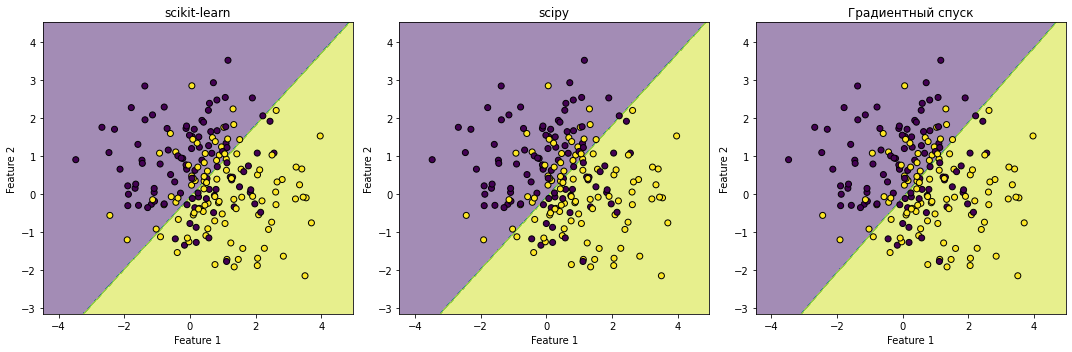

In [8]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Построение графика с тремя логистическими регрессиями
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_decision_boundary(model, 'scikit-learn')

plt.subplot(1, 3, 2)
plot_decision_boundary_custom(weights_scipy, bias_scipy, 'scipy')

plt.subplot(1, 3, 3)
plot_decision_boundary_custom(weights_descent, bias_descent, 'Градиентный спуск')

plt.tight_layout()
plt.show()

# Оценка качества. AUC

- https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
- https://alexanderdyakonov.wordpress.com/2015/10/09/задачки-про-auc-roc/

In [9]:
# y = [0,1,1,1,0]
# y_pred_prob_1 = [0.02, 0.03, 0.95, 0.94, 0.92]
# y_pred_prob_2 = [0.4, 0.3, 0.7, 0.8, 0.75]


def score_to_class(thd, p):
    if p >= thd:
        return 1
    else:
        return 0
    
# thd = 0.02:
# y_pred_1 = [1,1,1,1,1]
# y_pred_2 = [1,1,1,1,1]

# thd = 0.5:
# y_pred_1 = [0,0,1,1,1]
# y_pred_2 = [0,0,1,1,1]

# thd = 0.75:
# y_pred_1 = [0,0,1,1,1]
# y_pred_2 = [0,0,0,1,0]

## Логика вычисления

Логика вычисления:
- пошагово меняем threshold от 0 до 1
- замеряем уровень TPR, FPR
- рисуем график, используя найденные значения FPR и TPR
- считаем площадь под графиком

<img src='http://www.st2c.de/img/rocAnimation.gif'>

<img src='https://miro.medium.com/v2/resize:fit:1200/0*hdzjbVoEQ0qSE8N2'>

## Сравнение моделей с различными AUC

<img src='https://www.researchgate.net/publication/8636163/figure/fig2/AS:202684352208899@1425335123086/Four-ROC-curves-with-different-values-of-the-area-under-the-ROC-curve-A-perfect-test-A.png'>

<img src='https://www.researchgate.net/publication/8636163/figure/fig3/AS:202684352208900@1425335123112/Two-ROC-curves-A-and-B-with-equal-area-under-the-ROC-curve-However-these-two-ROC.png'>

## Вероятностный смысл AUC

ROC AUC is the probability a randomly-chosen positive example is ranked more highly than a randomly-chosen negative example. This is due to the relationship between ROC AUC and the Wilcoxon test of ranks.

- https://johaupt.github.io/blog/Area_under_ROC_curve.html
- https://stats.stackexchange.com/questions/206911/relationship-between-auc-and-u-mann-whitney-statistic

- В целом, минимизируя log_loss, мы будем увеличивать AUC (в редких случаях модель с меньшим log_loss может иметь хуже AUC). Т.е. AUC и log_loss коррелируют друго с другом.
- Но плюс log_loss в том, что его можно дифференцировать -> оптимизировать с помощью градиентного спуска. AUC мы напрямую не можем оптимизировать.

## Gini coefficient (не путать с Gini impurity)

- https://alexanderdyakonov.wordpress.com/2015/12/15/знакомьтесь-джини/
- https://en.wikipedia.org/wiki/Gini_coefficient
- https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
- https://habr.com/ru/companies/ods/articles/350440/

𝐺𝑖𝑛𝑖=2×𝐴𝑈𝑅𝑂𝐶−1

<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*R1Z4f4FfJBTwxM8p_SBtRg.png'>

## Оценка качества модели с помощью AUC

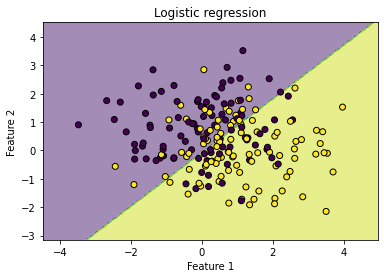

In [10]:
model = LogisticRegression(penalty=None)               # Убираем penalty
model.fit(X,y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

plot_decision_boundary(model, 'Logistic regression')

## Используя реализацию из sklearn

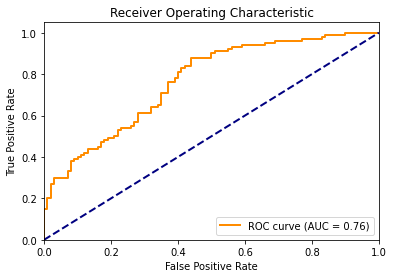

0.7640999999999999


In [11]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Имея истинные метки классов и предсказанные вероятности класса "1":
y_true = y.copy()
y_pred_proba = model.predict_proba(X)[:,1]

# Вычислить значения TPR и FPR для построения графика ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

# Вычислить AUC
auc_score = auc(fpr, tpr)

# Построение графика ROC
def plot_roc(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc(fpr, tpr)
print(auc_score)

## Домашнее задание. ROC AUC без использования готовой реализации

Неоходимо реализовать расчет метрики ROC AUC без использования готовой реализации

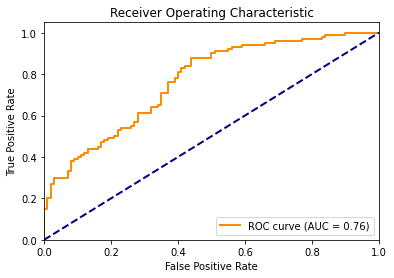

0.7641


In [14]:
def calculate_roc_curve(y_true, y_pred_proba):
    # Вычисление значений TPR и FPR
    tpr_values = []
    fpr_values = []

    # Your code here
    # ...
    
    return fpr_values, tpr_values, thresholds

def calculate_auc(fpr, tpr):
    # Численное вычисление площади под кривой (например, метод трапеций/прямоугольников/Симпсона (?))
    # Your code here
    # ...
    
    return auc_score

# Вычислить значения TPR и FPR для построения графика ROC
fpr_values, tpr_values, thresholds = calculate_roc_curve(y_true, y_pred_proba)

# Вычислить AUC
auc_score = calculate_auc(fpr_values, tpr_values)

# Построение графика ROC
plot_roc(fpr_values, tpr_values)
print(auc_score)

## Игрушечный пример

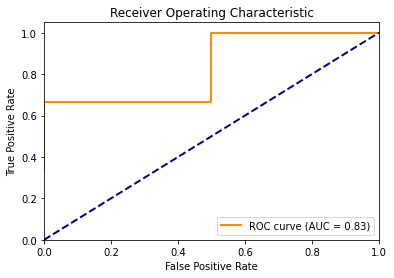

In [12]:
# y = [0,1,1,1,0]
# y_pred_prob_1 = [0.02, 0.03, 0.95, 0.94, 0.92]
# y_pred_prob_2 = [0.4, 0.3, 0.7, 0.8, 0.75]

fpr_values, tpr_values, thresholds = calculate_roc_curve([0,1,1,1,0], [0.02, 0.03, 0.95, 0.94, 0.92])

# Вычислить AUC
auc_score = calculate_auc(fpr_values, tpr_values)

# Построение графика ROC
plot_roc(fpr_values, tpr_values)

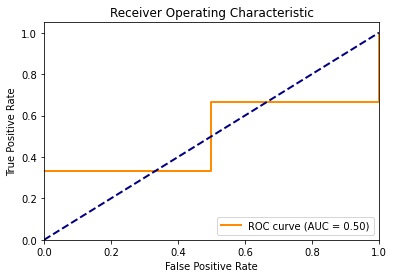

In [13]:
# y = [0,0,1,1,1]
# y_pred_prob_1 = [0.02, 0.03, 0.95, 0.94, 0.92]
# y_pred_prob_2 = [0.4, 0.3, 0.7, 0.8, 0.75]

fpr_values, tpr_values, thresholds = calculate_roc_curve([0,1,1,1,0], [0.4, 0.3, 0.7, 0.8, 0.75])

# Вычислить AUC
auc_score = calculate_auc(fpr_values, tpr_values)

# Построение графика ROC
plot_roc(fpr_values, tpr_values)

# Другие способы построить разделительную линию

## Fisher's LDA

<img src='https://miro.medium.com/v2/resize:fit:556/0*aIN2UtyTIxTleQtK.png'>

<img src='https://miro.medium.com/v2/resize:fit:662/format:webp/1*Kn2Jf0QkNtmwgz253hdIIw.png'>

<img src='https://miro.medium.com/v2/resize:fit:1244/format:webp/1*e2xzPGfWCQjGugupJgcEww.png'>

<img src='https://miro.medium.com/v2/resize:fit:1232/format:webp/1*1inGh5D86sPK5Dce_XcbVA.png'>

<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*Zj8OBbYnyBZZib8jquWkIA.png'>

## SVM

<img src='https://media.licdn.com/dms/image/D5612AQHoPHsBZlmiNg/article-cover_image-shrink_600_2000/0/1682854747143?e=2147483647&v=beta&t=kFU_kScN6OwJXAj2UlpyfIL1zIc7twzoA51lRcPx0xg'>

## Обучение SVM и LDA

In [14]:
from sklearn.svm import SVC

model_svc = SVC(kernel='linear', degree=1, probability=False)
model_svc.fit(X,y)

SVC(degree=1, kernel='linear')

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X,y)

LinearDiscriminantAnalysis()

## Сравнение decision boundary алгоритмов

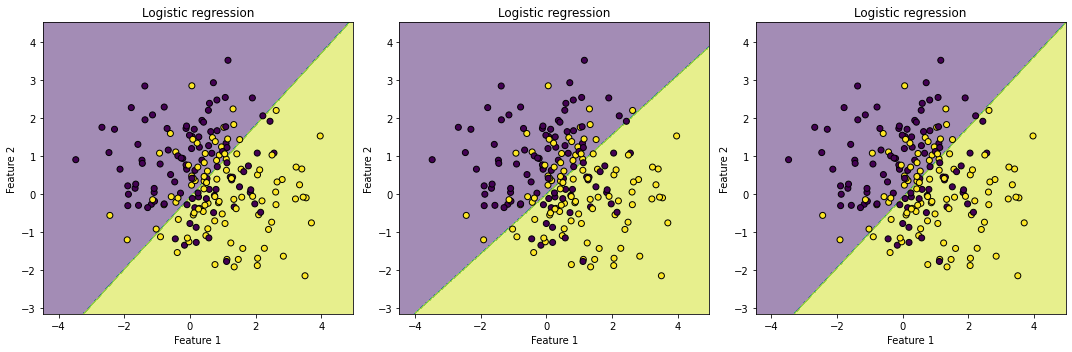

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_decision_boundary(model, 'Logistic regression')

plt.subplot(1, 3, 2)
plot_decision_boundary(model_svc, 'Logistic regression')

plt.subplot(1, 3, 3)
plot_decision_boundary(model_lda, 'Logistic regression')

plt.tight_layout()
plt.show()

## Коэффициенты разделяющих линий

In [17]:
model.coef_, model.intercept_

(array([[ 0.64910551, -0.68625803]]), array([-0.05601439]))

In [18]:
model_svc.coef_, model_svc.intercept_

(array([[ 0.53314571, -0.68201307]]), array([-0.00336576]))

In [19]:
model_lda.coef_, model_lda.intercept_

(array([[ 0.62322761, -0.6736222 ]]), array([-0.06005272]))

Дополнительные материалы:
- https://www.dmitrymakarov.ru/opt/logistic-regression-05/